<a href="https://colab.research.google.com/github/GiX7000/10-machine-learning-algorithms-from-scratch/blob/main/04_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Perceptron classifier

In this notebook, we will focus on a single layer [perceptron](https://www.youtube.com/watch?v=A3obZhw7Jc4), whhich is also known as the Prototype for Neural Networks.

In [ ]:
# imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

## 1. Create a toy dataset and visualize it.

In [ ]:
# create the dataset
X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=1.05, random_state=4)

# split iiit to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# let's see some things about the data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train.dtype, X_test.dtype)
print(X_train[5])
print(y_train[5])
print(np.unique(y_train))

(160, 2) (160,) (40, 2) (40,)
float64 float64
[ 8.74747772 -0.67543052]
0
[0 1]


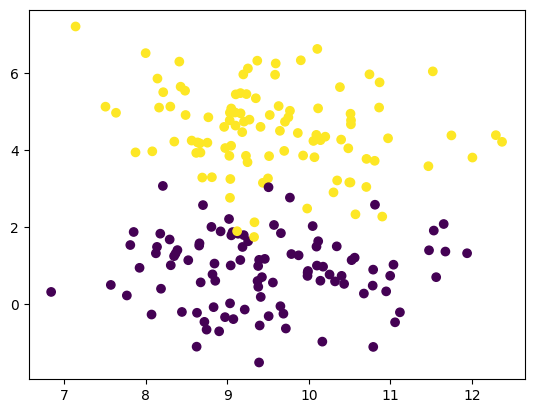

In [ ]:
# plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

## 2. Create the Perceptron model.

In [ ]:
# activation function
def unit_step_func(x):
    return np.where(x > 0 , 1, 0)

In [ ]:
# create perceptron's class
class Perceptron:
  # 'constructor'
  def __init__(self, learning_rate=0.001, n_iters=1000):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.activation_func = unit_step_func
    self.weights = None
    self.bias = None

  # fit function for training
  def fit(self, X, y):
    n_samples, n_features = X.shape

    # init parameters
    self.weights = np.zeros(n_features)
    self.bias = 0

    # all class labels can be 0 or 1
    y_ = np.where(y > 0 , 1, 0)

    # learn weights
    for _ in range(self.n_iters):
      for idx, x_i in enumerate(X):
        linear_output = np.dot(x_i, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)

        # Perceptron update rule
        update = self.lr * (y_[idx] - y_predicted)
        self.weights += update * x_i
        self.bias += update


  def predict(self, X):
    linear_output = np.dot(X, self.weights) + self.bias
    y_predicted = self.activation_func(linear_output)
    return y_predicted

## 3. Train, predict and evaluate the model.

In [ ]:
# create ana instance of our perceptron classifier
clf_perceptron = Perceptron()

# train the classifier
clf_perceptron.fit(X_train, y_train)

In [ ]:
# predict on test set
predictions = clf_perceptron.predict(X_test)

# Print the predictions and the actual labels
print("Predictions:", np.array(predictions))
print("Actual Labels:", y_test)

Predictions: [1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0
 0 1 0]
Actual Labels: [1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0
 0 1 0]


Let's use how good our model is.

In [ ]:
# accuracy function
def accuracy(y_true, y_pred):
  return np.sum(y_true == y_pred) / len(y_true)

print("Perceptron's classification accuracy:  ", accuracy(y_test, predictions))

Perceptron's classification accuracy:   0.925


Accuracy is 92,5%, let's plot our custom perceptron's decision line!

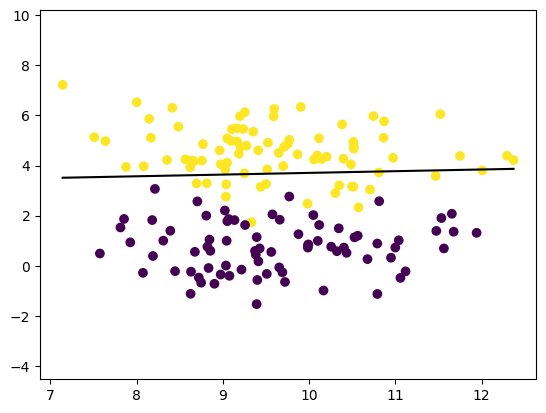

In [ ]:
# let's plot it
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-clf_perceptron.weights[0] * x0_1 - clf_perceptron.bias) / clf_perceptron.weights[1]
x1_2 = (-clf_perceptron.weights[0] * x0_2 - clf_perceptron.bias) / clf_perceptron.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")
ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])
plt.show()

## 4. Compare with Perceptron classifier from scikit-learn library.

Let's see now, what results a [Perceptron classifier](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.Perceptron.html) from scikit-learn library gives us.

In [ ]:
# let's compare now with the accuracy that sklearn gives us
from sklearn.linear_model import Perceptron

clf_sklearn = Perceptron()
clf_sklearn.fit(X_train, y_train)
sklearn_predictions = clf_sklearn.predict(X_test)

In [ ]:
# let's check the accuracy now
print("sklearn-Perceptron's classification accuracy: ", accuracy(y_test, sklearn_predictions))

sklearn-Perceptron's classification accuracy:  0.9


Our custom perceptron got slightly better accuracy than sklearn's one. Although, in both cases, we can improve it.